In [2]:
# Import all required modules
import pandas as pd
import numpy as np

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

In [3]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [4]:
df = pd.read_csv('mlbootcamp5_train.csv', sep=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


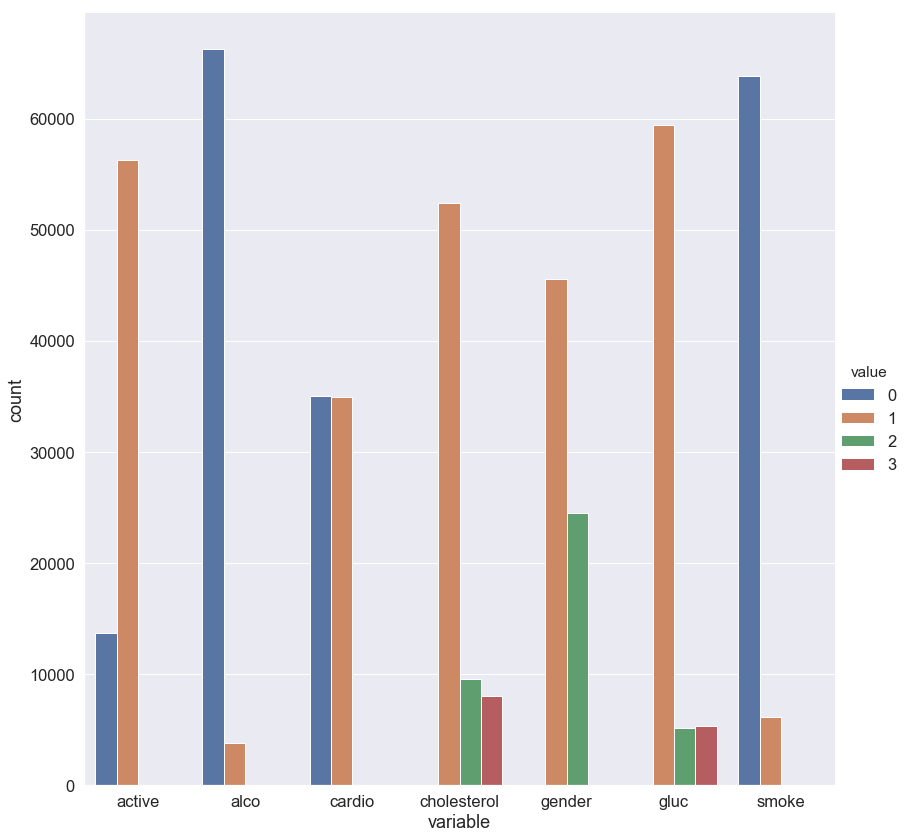

In [6]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.catplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', height=12);

45530 -- женщины
24470 -- мужчины


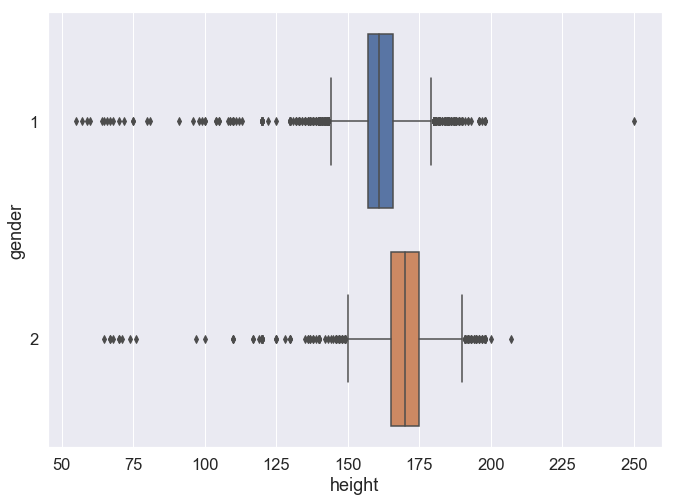

In [26]:
sns.boxplot(y='gender', x='height', data=df, orient='h')
print(len(df.loc[df['gender'] == 1]), '-- женщины')
print(len(df.loc[df['gender'] == 2]), '-- мужчины')

11 % -- процент потребления мужчинами алкоголя 
 3 % -- процент потребления женщин


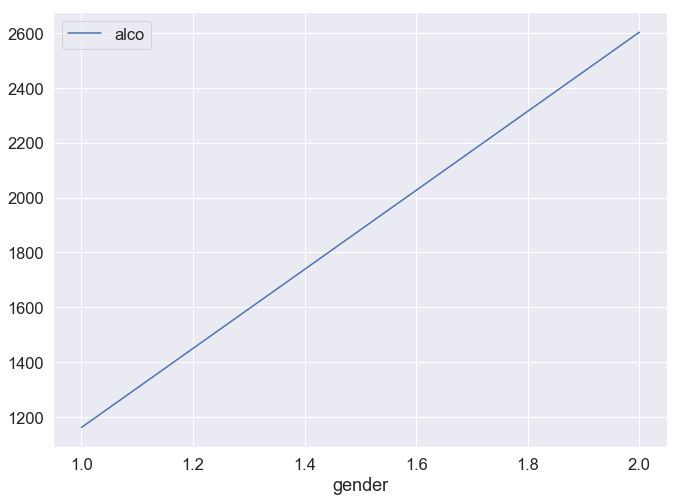

In [148]:
need = df[[x for x in df.columns if x in 'alco'] + ['gender']]
need.groupby('gender').sum().plot()
# ниже -- проверка гипотезы "в лоб"
a = (len(df.loc[(df['gender'] == 2) & (df['alco'] == 1)]))
b = (len(df.loc[(df['gender'] == 2)]))
c = a/b
d = len(df.loc[(df['gender'] == 1) & (df['alco'] == 1)])
e = len(df.loc[(df['gender'] == 1)])
f = d/e
print(round(c*100), '% -- процент потребления мужчинами алкоголя \n', round(f*100), '% -- процент потребления женщин')

In [150]:
#need = df[[x for x in df.columns if x in 'smoke'] + ['gender']]
#need.groupby('gender').sum().plot()
a = (len(df.loc[(df['gender'] == 2) & (df['smoke'] == 1)]))
b = (len(df.loc[(df['gender'] == 2)]))
c = a/b
d = len(df.loc[(df['gender'] == 1) & (df['smoke'] == 1)])
e = len(df.loc[(df['gender'] == 1)])
f = d/e
print(round((c-f)*100))

20


In [11]:
df['months'] = [int(day/30) for day in df['age']] 
smokers = df.loc[df['smoke'] == 1]
non_smokers = df.loc[df['smoke'] == 0]

a = non_smokers['months'].median()
b = smokers['months'].median()
print(round(a-b))

20.0


In [130]:
# cardio 0 -- здоров 
subset = smokers.loc[(smokers.years >= 60) & (smokers.years <= 64)]
first_sub = subset.loc[(subset.ap_hi < 120) & (subset.cholesterol == 1)]
second_sub = subset.loc[(subset.ap_hi >= 160) & (subset.ap_hi < 180) & (subset.cholesterol == 3)]
print(round(len(first_sub)/len(second_sub)))

3


In [12]:
# 18,5—24,99 -- Норма
df['years'] = [int(day/365) for day in df['age']] 
df['bmi'] = [round(m/((h/100)**2), 2) for m, h in zip(df['weight'], df['height'])] 
print('Медианный ИМТ -- ', df['bmi'].median())
print('Медианный ИМТ женщин -- ', df['bmi'].loc[df.gender == 1].median())
print('Медианный ИМТ мужчин -- ', df['bmi'].loc[df.gender == 2].median())
data_health = df.loc[df['cardio'] == 0]
data_unhealth = df.loc[df['cardio'] == 1]
print('ИМТ здоровых --' , data_health['bmi'].median())
print('ИМТ больных --' , data_unhealth['bmi'].median())
data_health_noalc = data_health.loc[data_health['alco'] == 0]
print('Медианный ИМТ женщин здоровых -- ', data_health_noalc['bmi'].loc[data_health_noalc.gender == 1].median())
print('Медианный ИМТ мужчин здоровых -- ', data_health_noalc['bmi'].loc[data_health_noalc.gender == 2].median())

Медианный ИМТ --  26.375
Медианный ИМТ женщин --  26.71
Медианный ИМТ мужчин --  25.91
ИМТ здоровых -- 25.48
ИМТ больных -- 27.47
Медианный ИМТ женщин здоровых --  25.65
Медианный ИМТ мужчин здоровых --  25.1


In [185]:
# отбрасываем те, что 
dp = df.loc[df.ap_hi > df.ap_lo]
max_height = df['height'].quantile(q=0.975) # строго больше
min_height = df['height'].quantile(q=0.025) # строго меньше
max_weight = df['weight'].quantile(q=0.975) # строго больше
min_weight = df['weight'].quantile(q=0.025) # строго меньше

subset = dp.loc[(dp.height >= min_height) & (dp.height <= max_height) & (dp.weight >= min_weight) & (dp.weight <= max_weight)]

print(round((len(df)-len(subset))/len(df)*100))

10


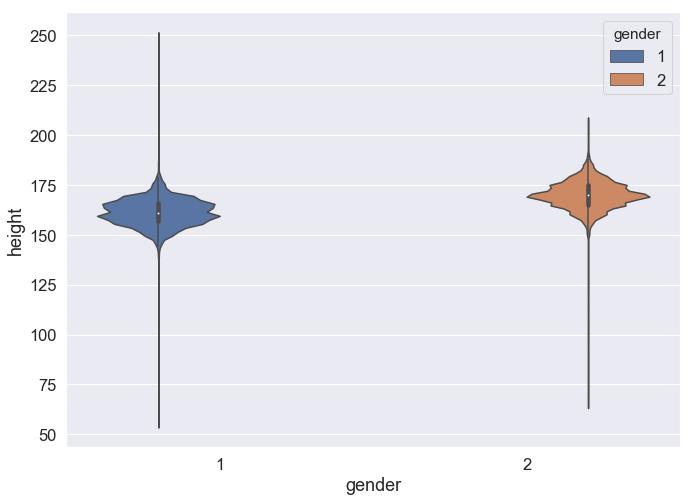

In [20]:
sns.violinplot(x='gender', y='height', hue='gender', scale='count', data=df);

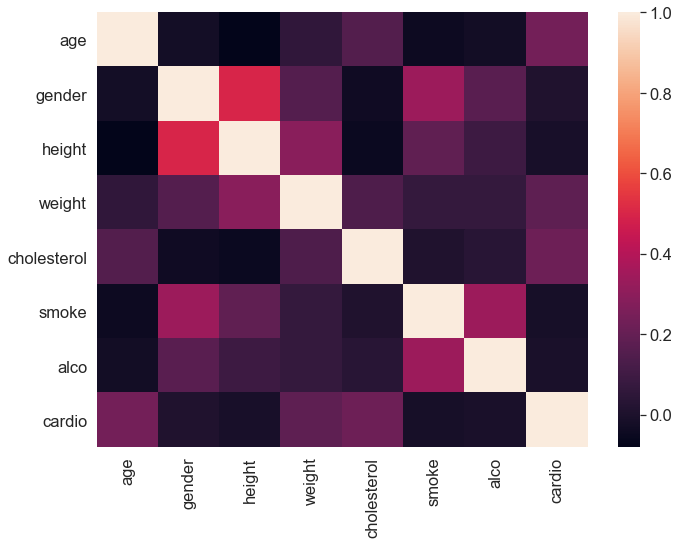

In [13]:
corr_matrix = df.drop(['ap_hi', 'ap_lo', 'gluc', 'active', 'id', 'months', 'bmi', 'years'], axis=1).corr()
sns.heatmap(corr_matrix);

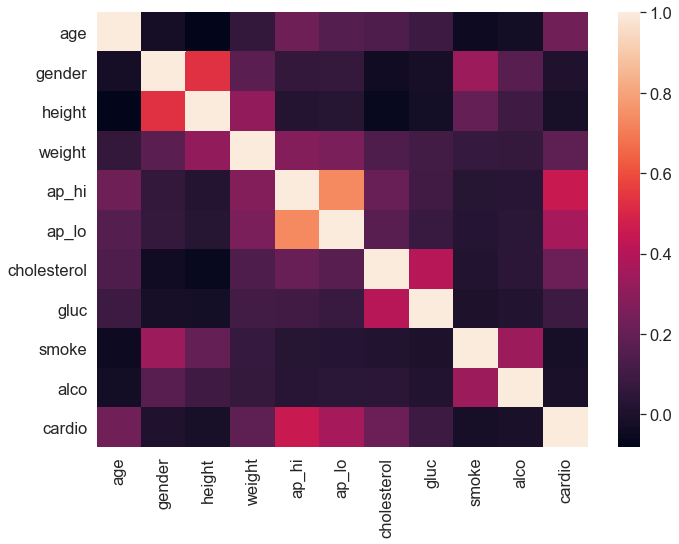

In [14]:
corr_matrix = df.drop(['active', 'id', 'months', 'bmi', 'years'], axis=1).corr(method='spearman')
sns.heatmap(corr_matrix);

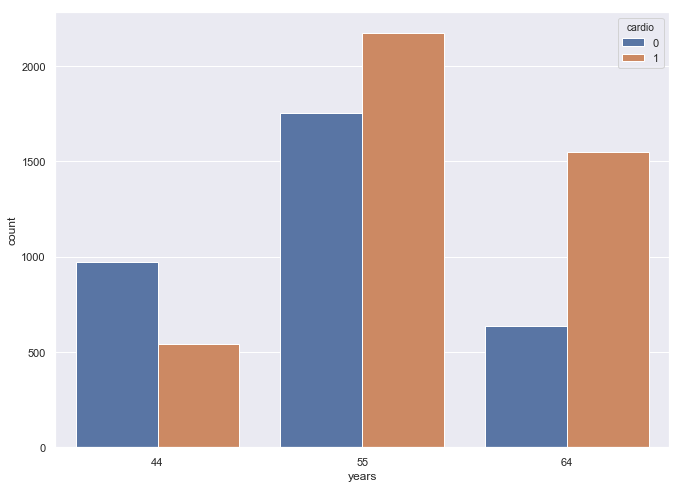

In [26]:
subset = df.loc[(df.years == 44) | (df.years == 55) | (df.years == 64) | (df.years == 70)]
sns.countplot(x='years', hue='cardio', data=subset)